In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/Admin/Downloads/titanic_train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_isnull=df

In [6]:
df_isnull.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_isnull['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
df_isnull['Embarked'].mode()

0    S
dtype: object

In [9]:
# using the replace() method 
df_isnull['Embarked'].replace(to_replace ='None',  
                 value = "S",  
                  inplace = True) 

In [10]:
df_isnull['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
df_isnull=pd.get_dummies(df_isnull,columns=["Sex"])

In [12]:
df_isnull.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [13]:
df_isnull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Sex_female   891 non-null    uint8  
 12  Sex_male     891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(2)
memory usage: 78.4+ KB


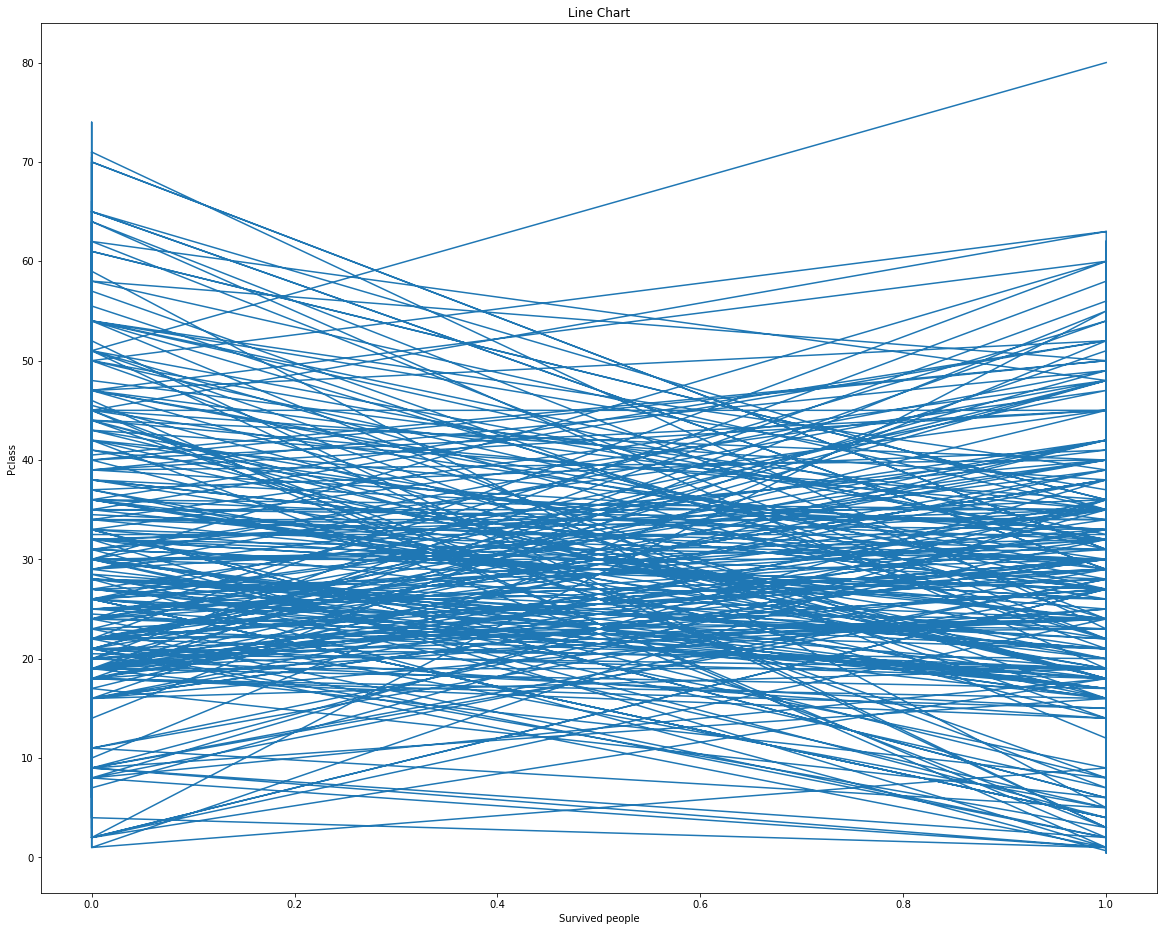

In [18]:
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame, and 'x_column' and 'y_column' are the columns representing time and the corresponding values
plt.figure(figsize=(20, 16))
plt.plot(df['Survived'], df['Age'])
plt.xlabel('Survived people')
plt.ylabel('Pclass')
plt.title('Line Chart')
plt.show()

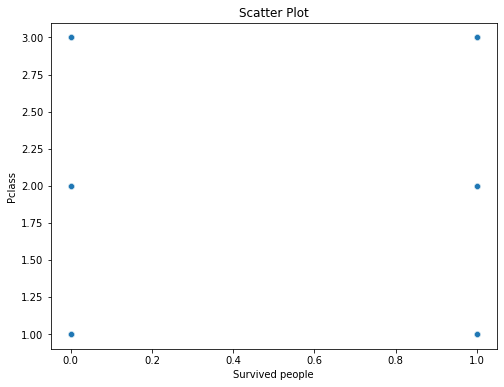

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame, and 'x_column' and 'y_column' are the columns you want to compare
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Survived', y='Pclass')
plt.xlabel('Survived people')
plt.ylabel('Pclass')
plt.title('Scatter Plot')
plt.show()

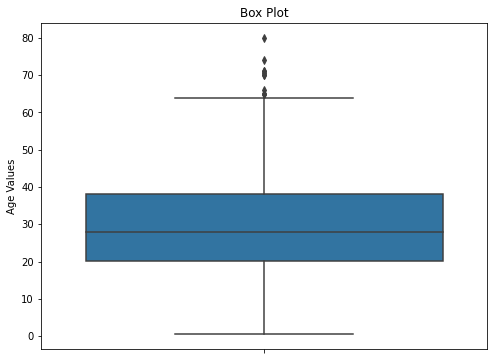

In [19]:
# Assuming 'df' is your DataFrame, and 'column_name' is the column you want to plot a box plot for
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Age')
plt.ylabel('Age Values')
plt.title('Box Plot')
plt.show()

In [20]:
# Get the numerical values of the boxplot
boxplot_values = df['Age']

# Calculate the interquartile range (IQR)
Q1 = boxplot_values.quantile(0.25)
Q3 = boxplot_values.quantile(0.75)
IQR = Q3 - Q1

# Define outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(boxplot_values < lower_bound) | (boxplot_values > upper_bound)]

# Print outliers
print("Outliers:")
print(outliers)

Outliers:
     PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
280          281         0       3                      Duane, Mr. Frank   
456          457         0       1             Millet, Mr. Francis Davis   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   male